In [23]:
#Zipcodes
zipSeattle =[98101,98102,98103,98104,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98121,98122,98125,98126,98133,98134,98136,98144,98154,98164,98174,98195,98199]

zipBay = [94002,94005,94010,94014,94015,94019,94020,94021,94025,94027,94028,94030,94037,94038,94044,94060,94061,94062,94063,94065,94066,94070,94074,94080,94102,94103,94104,94105,94107,94108,94109,94110,94111,94112,94114,94115,94116,94117,94118,94121,94122,94123,94124,94127,94128,94129,94130,94131,94132,94133,94134,94158,94401,94402,94403,94404,94501,94502,94505,94506,94507,94509,94511,94513,94514,94516,94517,94518,94519,94520,94521,94523,94525,94526,94528,94530,94531,94536,94538,94539,94541,94542,94544,94545,94546,94547,94548,94549,94550,94551,94552,94553,94555,94556,94560,94561,94563,94564,94565,94566,94568,94569,94572,94575,94577,94578,94579,94580,94582,94583,94586,94587,94588,94595,94596,94597,94598,94601,94602,94603,94605,94606,94607,94608,94609,94610,94611,94612,94613,94618,94619,94621,94702,94703,94704,94705,94706,94707,94708,94709,94710,94720,94801,94803,94804,94805,94806,94850,94901,94903,94904,94920,94924,94925,94929,94930,94933,94937,94938,94939,94940,94941,94945,94946,94947,94949,94950,94956,94957,94960,94963,94964,94965,94970,94971,94973]

zipAustin = [78701,78705,78722,78728,78732,78736,78744,78748,78752,78758,78702,78717,78723,78729,78733,78738,78745,78749,78753,78759,78703,78719,78725,78730,78734,78739,78746,78750,78756,78704,78721,78727,78731,78735,78742,78747,78751,78757]

In [24]:
import requests
import pandas as pd

#pip install quandl
import quandl

quandl.ApiConfig.api_key = 'GENoqCLiUfGvtBjP6HhD'





In [25]:
#Seattle housing prices
SeattleDF = pd.DataFrame()
for zipcode in zipSeattle:
    #returns pandas dataframe
    response = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id= str(zipcode))
    df = response.drop(columns=['indicator_id', 'date'])
    SeattleDF = pd.concat([SeattleDF, df], ignore_index=True)

In [26]:
#Bay housing prices
BayDF = pd.DataFrame()
for zipcode in zipBay:
    #returns pandas dataframe
    response = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id= str(zipcode))
    df = response.drop(columns=['indicator_id', 'date'])
    BayDF = pd.concat([BayDF, df], ignore_index=True)

In [27]:
#Austin housing prices
AustinDF = pd.DataFrame()
for zipcode in zipAustin:
    #returns pandas dataframe
    response = quandl.get_table('ZILLOW/DATA', indicator_id='ZSFH', region_id= str(zipcode))
    df = response.drop(columns=['indicator_id', 'date'])
    AustinDF = pd.concat([AustinDF, df], ignore_index=True)

In [28]:
display(SeattleDF)
display(BayDF)
display(AustinDF)

,region_id,value
0,98101,497759.0
1,98101,498753.0
2,98101,492368.0
3,98101,463890.0
4,98101,453639.0
...,...,...
5018,98199,214738.0
5019,98199,216207.0
5020,98199,217506.0
5021,98199,217997.0


,region_id,value
0,94002,469711.0
1,94002,459664.0
2,94002,451389.0
3,94002,430194.0
4,94002,419972.0
...,...,...
26281,94973,92913.0
26282,94973,92704.0
26283,94973,92962.0
26284,94973,93254.0


,region_id,value
0,78701,179665.0
1,78701,175993.0
2,78701,172798.0
3,78701,168626.0
4,78701,166058.0
...,...,...
3226,78731,77718.0
3227,78731,77563.0
3228,78731,77214.0
3229,78731,77198.0


In [49]:
import requests
from bs4 import BeautifulSoup

URL = "https://www.levels.fyi/Salaries/Software-Engineer/San-Francisco-Bay-Area/"
page = requests.get(URL)


soup = BeautifulSoup(page.content, "html.parser")
resultsBayArea = soup.find(id="total-median-compensation").getText()
salBay = resultsBayArea[1:].replace(",","")
print(salBay)

220000


In [50]:
URL = "https://www.levels.fyi/Salaries/Software-Engineer/Greater-Seattle-Area/"
page = requests.get(URL)


soup = BeautifulSoup(page.content, "html.parser")
resultsSeattle = soup.find(id="total-median-compensation").getText()
salSeattle = resultsSeattle[1:].replace(",","")
print(salSeattle)


210000


In [51]:
URL = "https://www.levels.fyi/Salaries/Software-Engineer/Greater-Austin-Area/"
page = requests.get(URL)


soup = BeautifulSoup(page.content, "html.parser")
resultsAustin = soup.find(id="total-median-compensation").getText()
salAustin = resultsAustin[1:].replace(",","")
print(salAustin)


155000


In [55]:
salaries = [salSeattle,salBay,salAustin]

In [85]:
MeanSeattle = SeattleDF["value"].mean()
MeanBay = BayDF["value"].mean()
MeanAustin = AustinDF["value"].mean()
housing = [MeanSeattle,MeanBay,MeanAustin]
print(housing)

[268219.8134580928, 196941.61606939055, 102076.70071185392]


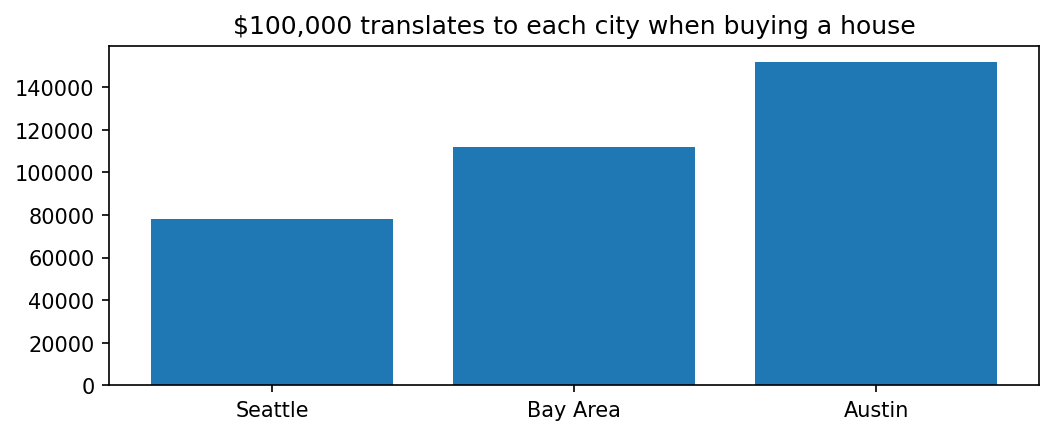

[78293.99226422579, 111708.2333286455, 151846.6005651378]


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

fig=plt.figure(dpi=150,figsize=[8,3])
cities = ["Seattle", "Bay Area", "Austin"]
ratio = []
for i in range(3):
    ratio.append(float(salaries[i])/float(housing[i])*100000)
    
#print(ratio)
plt.bar(cities, ratio)
plt.title("$100,000 translates to each city when buying a house" )


plt.show()

print(ratio)